In [177]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
import statistics as st
import re
import numpy as np
import math

In [178]:
path_0 = "/Users/mariam/Desktop/LCP2/project/F_data/" #change path according to machine, I worked locally on this part 
dirs_0 = os.listdir(path_0)

In [179]:
#read files 
dirs_01 = list()
files0 = list() #initial data
files1 = list() #filtered data
paths_1 = list()
for i,f in enumerate(dirs_0):
    if dirs_0[i].startswith('F'):
        paths_1.append(path_0+dirs_0[i])
    
    
for j,d in enumerate(paths_1):   
    if os.path.isdir(paths_1[j]):
        dirs_01 = os.listdir(paths_1[j])
        for dirs01 in dirs_01: 
            if dirs01.endswith(".csv"):
                if dirs01.startswith('F'):
                    files1.append(dirs01)
                elif dirs01.startswith("init"):
                    files0.append(dirs01)
                    
    

In [195]:
#get metalicities and alphas in a list correspondant to each folder with the right order
metalicities = list()
alphas = list()
for f in files1:
    part0 = f.partition('FZ')
    part1 = part0[2].partition('A')
    part2=part1[2].partition(".csv")
    m = float(part1[0])
    metalicities.append(m)
    a = float(part2[0])
    alphas.append(a)
print(metalicities)
print(len(metalicities))
print(alphas)
print(len(alphas))

[0.02, 0.01, 0.016, 0.014, 0.016, 0.014, 0.02, 0.01, 0.016, 0.02, 0.014, 0.01]
12
[3.0, 3.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 3.0, 0.5, 3.0, 0.5]
12


In [181]:
# metallicities = [0.01, 0.02, 0.014, 0.016]
# alphas = [0.5, 1, 3]

In [182]:
dfs = [] #list with 12 dataframes 
#create a list of dataframes from all the folders 
for i in range(0,len(paths_1)):
    df = pd.read_csv(paths_1[i]+'/'+files1[i])
    dfs.append(df)
dfs_1= pd.concat(dfs)
dfs_1 #dataframe with all the data joined together

,Unnamed: 0,ID,name,Mass_0,MHE_0,MCO_0,Radius_0,RHE_0,RCO_0,Luminosity_0,...,Phase_1,RemnantType_1,Zams_1,Semimajor,Period,Eccentricity,RL0,RL1,BWorldtime,BEvent
0,122,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.019889,...,1,0,2.0,1.051164,0.000311,6.100155e-17,0.753242,0.110132,10.900850,-1
1,78,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.276395,...,1,0,2.0,0.969121,0.000266,6.100860e-17,0.571129,0.192206,10.122550,-1
2,77,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.291220,...,1,0,2.0,0.964956,0.000263,6.100896e-17,0.565150,0.194038,10.115190,-1
3,76,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.306666,...,1,0,2.0,0.960629,0.000261,6.100935e-17,0.559080,0.195843,10.108100,-1
4,75,12646,0_368560710107917,1.193232,0.0,0.0,0.000016,0.0,0.0,0.322742,...,1,0,2.0,0.956134,0.000259,6.100977e-17,0.552920,0.197617,10.101270,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,1467,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,2.414411,...,1,0,2.0,1.284631,0.000278,2.954164e-13,0.488873,0.484676,9.453027,-1
3942,1471,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,1.941059,...,1,0,2.0,1.422566,0.000338,2.931839e-13,0.563872,0.514563,9.464738,-1
3943,1470,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,2.057918,...,1,0,2.0,1.387866,0.000323,2.936428e-13,0.544598,0.507392,9.461474,-1
3944,1469,3942529,0_335194715251492,1.390336,0.0,0.0,0.000016,0.0,0.0,2.176130,...,1,0,2.0,1.353283,0.000307,2.941621e-13,0.525665,0.500010,9.458444,-1


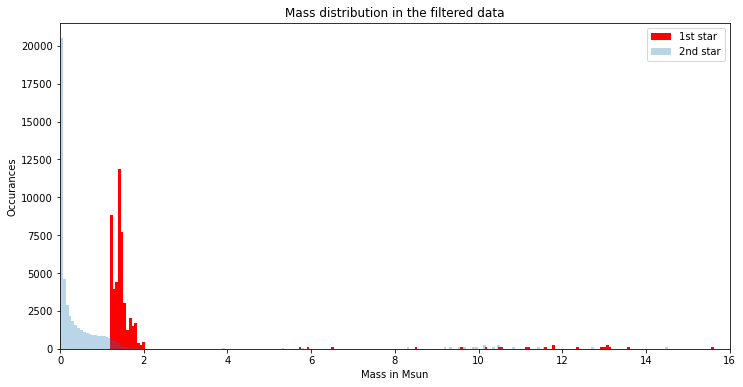

In [200]:
plt.figure(figsize=(12,6))
plt.hist(dfs_1['Mass_0'],label = '1st star', color = 'red', bins = 80)
plt.hist(dfs_1['Mass_1'],label = '2nd star',alpha = 0.3,bins=nbins)
plt.xlabel("Mass in Msun")
plt.ylabel("Occurances")
plt.xlim(0,16)
plt.title("Mass distribution in the filtered data")
plt.legend(loc='upper right')

In [201]:
m0_means = list()
m1_means = list()
m0_modes = list()
m1_modes = list()
for d in dfs:
    mean0 = st.mean(d['Mass_0'])
    m0_means.append(mean0)
    mean1 = st.mean(d['Mass_1'])
    m1_means.append(mean1)
    mode0 = st.mode(d['Mass_0'])
    m0_modes.append(mode0)
    mode1 = st.mode(d['Mass_1'])
    m1_modes.append(mode1)


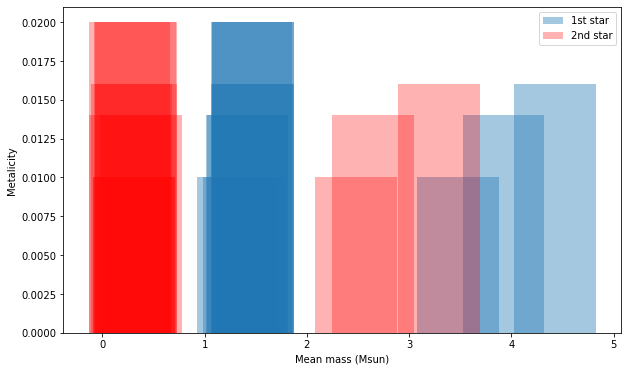

In [197]:
plt.figure(figsize=(10,6))
plt.bar(m0_means,metalicities,label = "1st star",alpha= 0.4)
plt.bar(m1_means,metalicities,label = "2nd star",color = 'red',alpha = 0.3)
plt.xlabel("Mean mass (Msun)")
plt.ylabel("Metalicity")
plt.title("Metalicity vs means of the masses")
plt.legend(loc = "best")

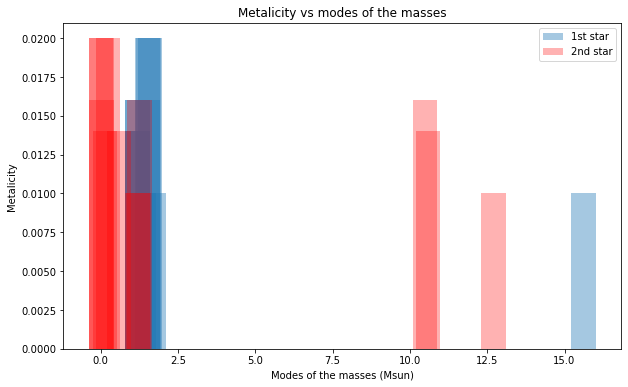

In [202]:
plt.figure(figsize=(10,6))
plt.bar(m0_modes, metalicities, label= '1st star',alpha = 0.4)
plt.bar(m1_modes,metalicities,label = "2nd star",color = 'red',alpha = 0.3)
plt.xlabel("Modes of the masses (Msun)")
plt.ylabel("Metalicity")
plt.title("Metalicity vs modes of the masses")
plt.legend(loc = "best")

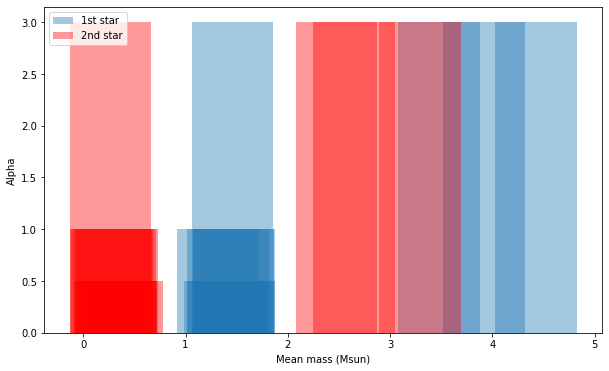

In [272]:
plt.figure(figsize=(10,6))
plt.bar(m0_means,alphas,label = "1st star",alpha = 0.4)
plt.bar(m1_means,alphas,label = "2nd star",alpha = 0.4,color = 'red')
plt.xlabel("Mean mass (Msun)")
plt.ylabel("Alpha")
plt.legend(loc = "best")

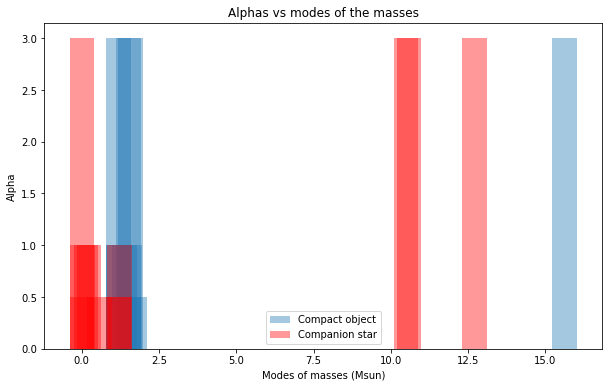

In [285]:
plt.figure(figsize=(10,6))
plt.bar(m0_modes,alphas,label = "Compact object",alpha = 0.4)
plt.bar(m1_modes,alphas,label = "Companion star",alpha = 0.4,color = 'red')
plt.xlabel("Modes of masses (Msun)")
plt.ylabel("Alpha")
plt.title("Alphas vs modes of the masses")
plt.legend(loc = "best")

In [213]:
# phases = pd.DataFrame()
# for d in dfs:
#     phases = phases.append(d['Phase_1'])

# phases = phases.fillna(55) #the lengths of the files differ that's why we get NaN, replace Nan with 55(random big number)
# phases = phases.T
# phases

In [253]:
mean_phase0 = st.mean(dfs_1['Phase_0'])
var_phase0 = st.variance(dfs_1['Phase_0'])
print("The mean of the phases for the 1st star is:",mean_phase0)  ###not meaningfull
#print("The variance of the phases is:", var_phase)

The mean of the phases for the 1st star is: 7


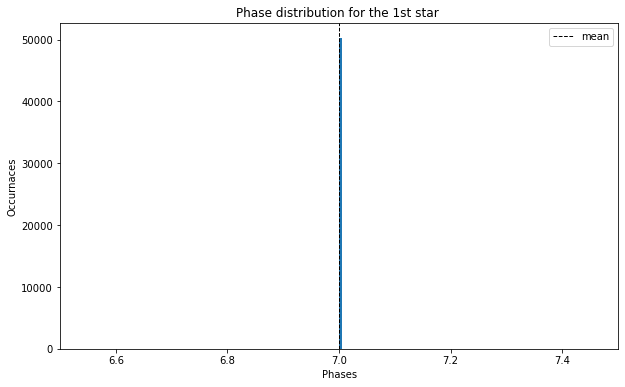

In [247]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Phase_0'],bins = nbins)
plt.xlim(6.5,7.5) 
plt.ylabel("Occurnaces")
plt.xlabel("Phases")
plt.title("Phase distribution for the 1st star ")
plt.axvline(mean_phase0, color='k', linestyle='dashed', linewidth=1,label = 'mean')
# plt.axvline(mean_phase + var_phase,color = 'r', linestyle='dashed', linewidth=1,label = 'variance')
# plt.axvline(mean_phase - var_phase,color = 'r', linestyle='dashed', linewidth=1 )
plt.legend(loc= 'best')
plt.show()


#The plot and the mean of the phase for the 1st star show that the 1st star is a remnant, which is natur

In [254]:
mean_rad_0 =  st.mean(dfs_1['Radius_0'])
print("The mean of the radii for the 1st star is ", mean_rad_0)

The mean of the radii for the 1st star is  1.758686014376456e-05


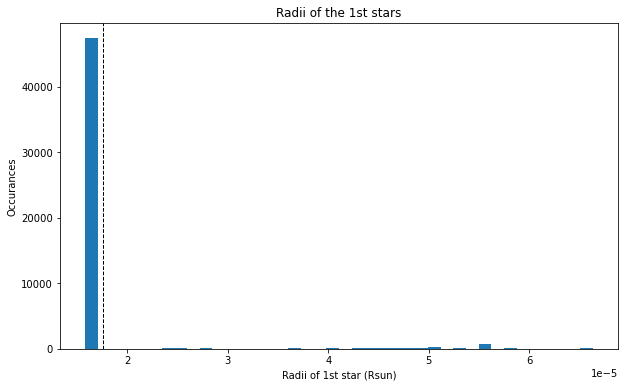

In [287]:
#phase vs radius 
plt.figure(figsize=(10,6))
plt.hist(dfs_1["Radius_0"],bins = 40)
plt.axvline(mean_rad_0,color='k', linestyle='dashed', linewidth=1,label = 'mean' )
plt.xlabel("Radii of 1st star (Rsun)")
plt.ylabel("Occurances")
plt.title("Radii of the 1st stars")
plt.show()

In [262]:
mean_phase_1 = st.mean(dfs_1['Phase_1'])
var_phase_1 = st.variance(dfs_1['Phase_1'])
print("The mean of the phases for the 2nd star is:",mean_phase_1)  
#print("The variance of the phases is:", var_phase)

The mean of the phases for the 2nd star is: 1.22160052567651


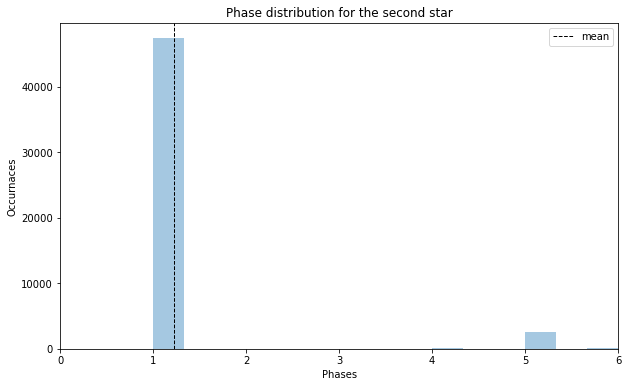

In [263]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Phase_1'],bins = 15,alpha = 0.4)
plt.xlim(0,6) 
plt.ylabel("Occurnaces")
plt.xlabel("Phases")
plt.title("Phase distribution for the second star")
plt.axvline(mean_phase_1, color='k', linestyle='dashed', linewidth=1,label = 'mean')
# plt.axvline(mean_phase + var_phase,color = 'r', linestyle='dashed', linewidth=1,label = 'variance')
# plt.axvline(mean_phase - var_phase,color = 'r', linestyle='dashed', linewidth=1 )
plt.legend(loc= 'best')
plt.show()


#The plot shows that for the second star we mostly have stars that are burning hydrogen in core
#Some stars have developed a Carbon-Oxygen (CO) core
#And very little-to-no stars that are burning He in the core or in a thin shell arounce the CO core

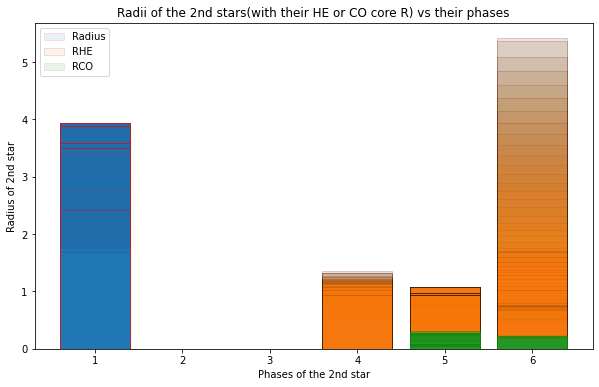

In [315]:
#phase vs radius 
plt.figure(figsize=(10,6))
plt.bar(dfs_1["Phase_1"],dfs_1["Radius_1"],alpha = 0.1,edgecolor="red",label= "Radius")
plt.bar(dfs_1["Phase_1"],dfs_1["RHE_1"],alpha = 0.1,edgecolor='black',label = "RHE")
plt.bar(dfs_1["Phase_1"],dfs_1["RCO_1"],alpha = 0.1,edgecolor='green',label = "RCO")

plt.ylabel("Radius of 2nd star")
plt.xlabel("Phases of the 2nd star")
plt.title("Radii of the 2nd stars(with their HE or CO core R) vs their phases")
plt.legend(loc='best')
plt.show()

In [173]:
mean_semimaj = st.mean(dfs_1['Semimajor'])
var_semimaj = st.variance(dfs_1['Semimajor'])
print("The mean of the semimajor axes is:",mean_semimaj)
#print("The variance of the semimajor axes is:", var_semimaj)



The mean of the semimajor axes is: 1.0185191232293265


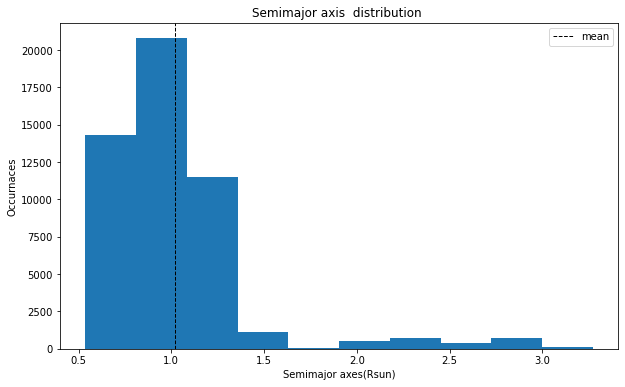

In [288]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Semimajor'])
plt.xlabel("Semimajor axes(Rsun)")
plt.ylabel("Occurnaces")
plt.title("Semimajor axis  distribution ")
plt.axvline(mean_semimaj, color='k', linestyle='dashed', linewidth=1,label = 'mean')
# plt.axvline(mean_semimaj+var_semimaj,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
# plt.axvline(mean_semimaj-var_semimaj,color = 'r', linestyle='dashed', linewidth=1)
plt.legend(loc= 'best')
plt.show()

In [276]:
mean_ecc = st.mean(dfs_1['Eccentricity'])
#var_ecc = st.variance(dfs_1['Eccentricity'])
print("The mean of the eccentricities is:",mean_ecc)
#print("The variance of the eccentricities is:", var_ecc)

The mean of the eccentricities is: 0.00035906496981674625


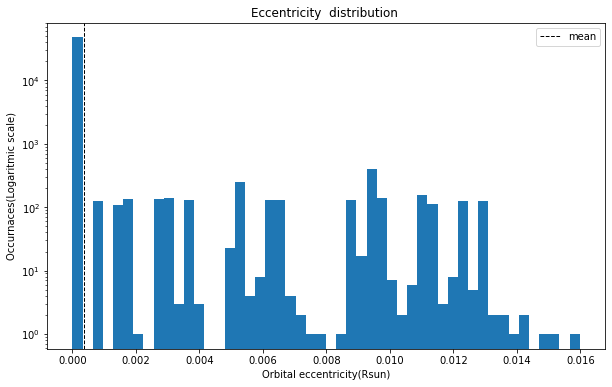

In [290]:
plt.figure(figsize=(10,6))
plt.hist(dfs_1['Eccentricity'],bins = 50,log = True)
plt.xlabel("Orbital eccentricity(Rsun)")
plt.ylabel("Occurnaces(Logaritmic scale)")
#plt.xlim(0,0.4)
plt.title("Eccentricity  distribution ")
plt.axvline(mean_ecc, color='k', linestyle='dashed', linewidth=1,label = 'mean')
#plt.axvline(mean_ecc + var_ecc,color = 'r', linestyle='dashed', linewidth=1, label = 'variance')
#plt.axvline(mean_ecc - var_ecc,color = 'r', linestyle='dashed', linewidth=1)
plt.legend(loc= 'best')
plt.show()

In [305]:
semim_means = list() #list with the means of the semimajor axes for each folder 
eccen_means = list() #list with the means of the eccentricities for each folder

for d in dfs:
    semim = st.mean(d['Semimajor'])
    semim_means.append(semim)
    ecc = st.mean(d['Eccentricity'])
    eccen_means.append(ecc)


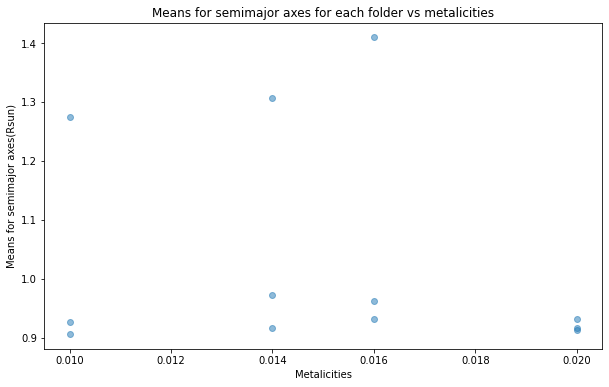

In [361]:
plt.figure(figsize=(10,6))
plt.scatter(metalicities,semim_means,alpha = 0.5)
plt.xlabel("Metalicities")
plt.ylabel("Means for semimajor axes(Rsun)")
plt.title("Means for semimajor axes for each folder vs metalicities")
plt.show()

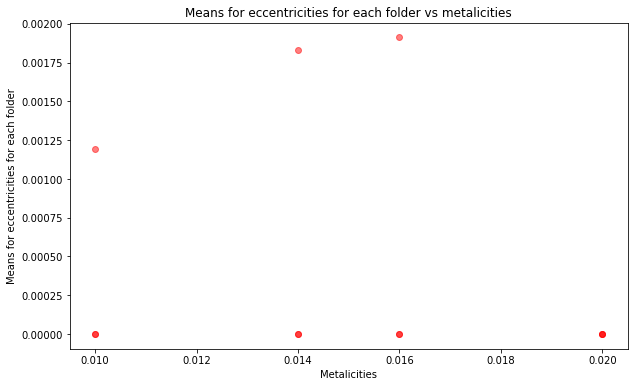

In [360]:
plt.figure(figsize=(10,6))
plt.scatter(metalicities,eccen_means,color = 'red',alpha= 0.5)
plt.xlabel("Metalicities")
plt.ylabel("Means for eccentricities for each folder")
plt.title("Means for eccentricities for each folder vs metalicities")
plt.show()

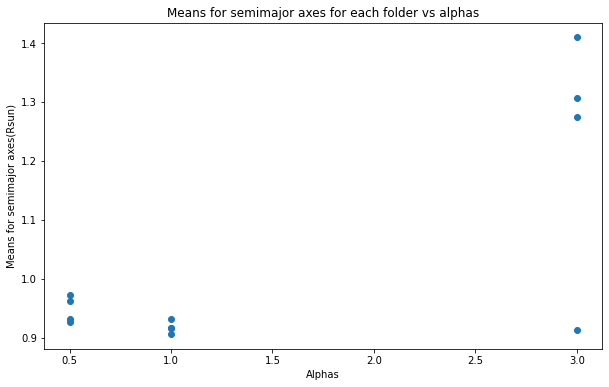

In [370]:
plt.figure(figsize=(10,6))
plt.scatter(alphas,semim_means)
plt.xlabel("Alphas")
plt.ylabel("Means for semimajor axes(Rsun)")
plt.title("Means for semimajor axes for each folder vs alphas")
plt.show()

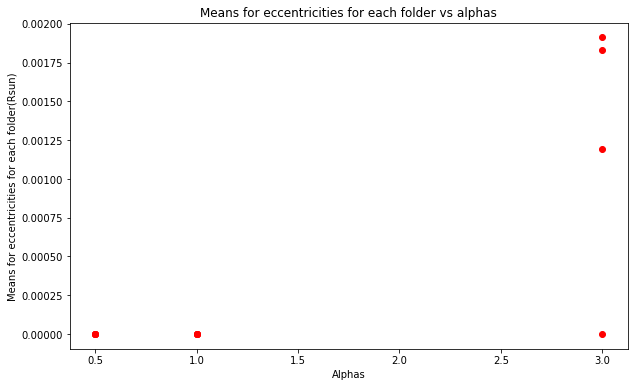

In [371]:
plt.figure(figsize=(10,6))
plt.scatter(alphas,eccen_means,color = 'red') #width = 0.05,
plt.xlabel("Alphas")
plt.ylabel("Means for eccentricities for each folder(Rsun)")
plt.title("Means for eccentricities for each folder vs alphas")
plt.show()